<a href="https://colab.research.google.com/github/nhula01/polymath/blob/main/Module_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chapter 3: Calculus and Optimization

3.2 Continuity and Differentiation

The limit of a function approaching x=a could be expressed as:
$lim_{x\rightarrow a} f(x)$

In [2]:
from sympy import *

x = symbols('x')
expr = 2*x**2;

print("Expression : {}".format(expr))

# Use sympy.limit() method
limit_expr = limit(expr, x, 0)

print("Limit of the expression tends to 0: {}".format(limit_expr))

Expression : 2*x**2
Limit of the expression tends to 0 : 0


A function is continuous if there is no sudden change and the limit exists at all points.

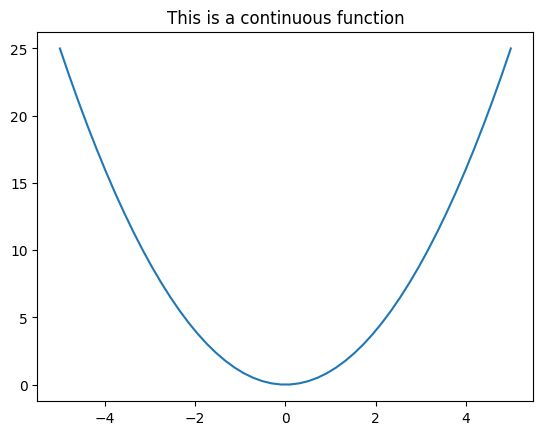

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def func(x):
  return x**2
x = np.linspace(-5,5)
y = func(x)
plt.plot(x,y)
plt.title("This is a continuous function")
plt.show()

Local and global extremum points could be found using differentiation. But in this case, we will only speculate

In [5]:
# the function above has a minimum at (0,0)
x_min = 0
x_check = np.linspace(-10,10,100)
flag = 0
for x in x_check:
  if func(x)<=func(x_min):
    flag = 1
if flag==0:
  print("The minimum is indeed at 0")
else:
  print("The minimum is not at 0")

The minimum is indeed at 0


Derivative is the instantaneous change of a function

In [8]:
x = Symbol('x')
#define the function
f = x**3 + 2*x
#derivative
derivative_f = f.diff(x)

print(derivative_f)

3*x**2 + 2



Rolle theorem: if $f(a)=f(b)$, that means $f'(c)=0$ at some points $a<c<b$

In [9]:
#we can check that
func(-2)==func(2)

True

In [11]:
#and there exists c=0 where the derivative is 0
2*(0)

0

Mean value theorem: there exists a c such that $\frac{f(b)-f(a)}{b-a}=f'(c)$ where $a<c<b$

Now, we explore a function with multiple independent variables.

For example, we can find the partial derivative of $f(x,y)=x^2+3y^2$ by holding x and y constant respectively.

In [13]:
from sympy import symbols, diff
x, y = symbols('x y', real=True)
f=x**2+3*y**2
partial_x=diff(f,x)
partial_y=diff(f,y)
print("partial derivative with respect to x=",partial_x)
print("partial derivative with respect to y=",partial_y)

partial derivative with respect to x= 2*x
partial derivative with respect to y= 6*y


The partial derivatives form the gradient of the problem

$\nabla f  = <2x,6y>$

Taylor's theorem is a way to approximate an exact function at a certain point

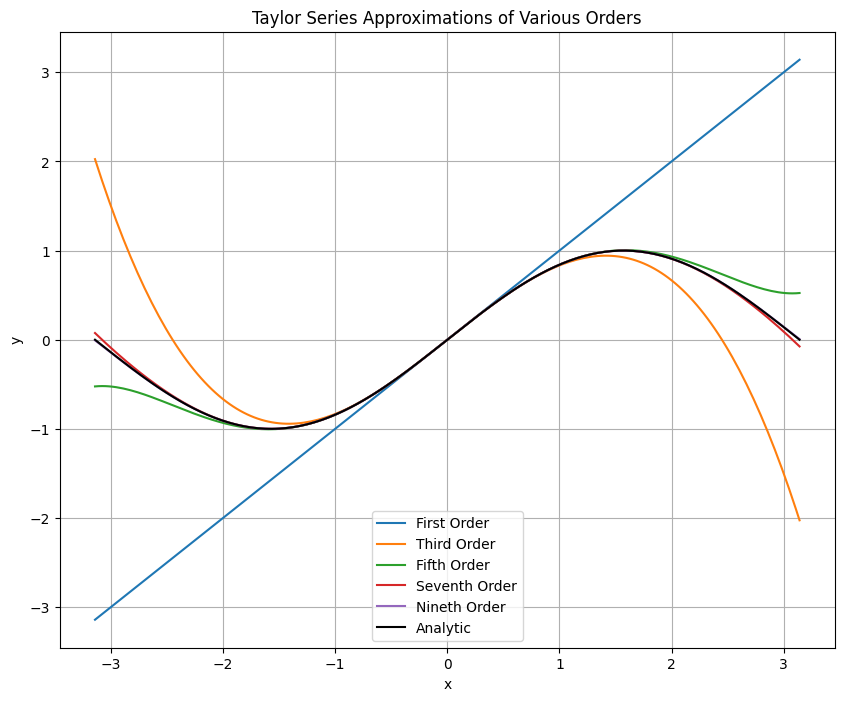

In [15]:
# find up to the nineth order approximation of sin(x)

x = np.linspace(-np.pi, np.pi, 200)
y = np.zeros(len(x))

labels = ['First Order', 'Third Order', 'Fifth Order', 'Seventh Order','Nineth Order']

plt.figure(figsize = (10,8))
for n, label in zip(range(5), labels):
    y = y + ((-1)**n * (x)**(2*n+1)) / np.math.factorial(2*n+1)
    plt.plot(x,y, label = label)

plt.plot(x, np.sin(x), 'k', label = 'Analytic')
plt.grid()
plt.title('Taylor Series Approximations of Various Orders')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

3.3 Unconstrained Optimization

We want to investigate in the form of $min_{\mathbf{x}\in\mathbb{R}^d} f(\mathbf{x})$ where $f: \mathbb{R}^d \rightarrow \mathbb{R}$

Global minimizer: $\mathbf{x*}$ is the global minimizer when $ f(\mathbf{x}) \ge  f(\mathbf{x*})$ for all $\mathbf{x}$

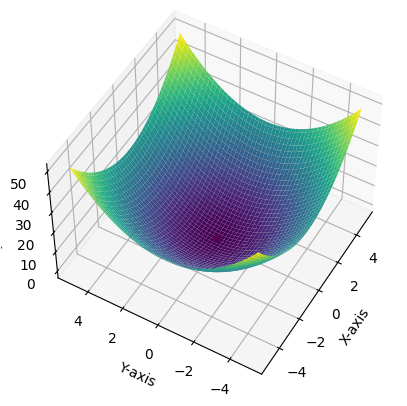

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to visualize
def f(x, y):
    return x**2+y**2
# Create a meshgrid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = f(x, y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, z, cmap='viridis')

# Add labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# show the minimum point
ax.scatter(0, 0, f(0, 0), color='red', label='Global Minimum')
ax.view_init(elev=50, azim=-150)

# Show the plot
plt.show()

Local minimizer:  $\mathbf{x*}$ is the local minimizer if there is a $δ>0$ such that $ f(\mathbf{x}) \ge  f(\mathbf{x*})$ for all $\mathbf{x}$ for ∀x∈Bδ (x∗){x∗}.

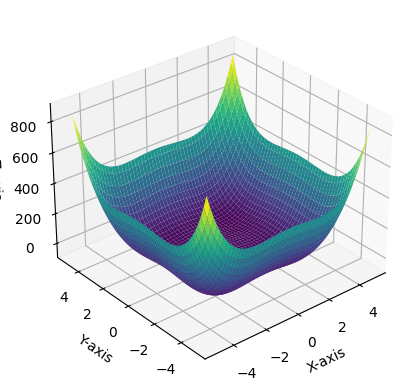

In [33]:
# Define the function to visualize
def f(x, y):
    return x**4+y**4-8*x**2-8*y**2
# Create a meshgrid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = f(x, y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, z, cmap='viridis')

# Add labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# show the minimum point
ax.scatter(0, 0, f(0, 0), color='red', label='Global Minimum')
ax.view_init(elev=30, azim=-130)

# Show the plot
plt.show()
#we can see there are four local minimizers

Descent Direction: If we have $f: \mathbb{R}^d \rightarrow \mathbb{R}$ continuous and differentiable at $\mathbf{x_0}$ where $\nabla f(\mathbf{x_0})$ is not 0, then $f$ has a descent direction at $\mathbf{x_0}$.

First-order necessary condition: for $f: \mathbb{R}^d \rightarrow \mathbb{R}$ to be continuously differentiable on $\mathbb{R}^d$, we need to have $\nabla f(\mathbf{x_0})=0$ if $\mathbf{x_0}$ is a local minimizer

Second-order necessary condition: for $f: \mathbb{R}^d \rightarrow \mathbb{R}$ to be twice continuously differentiable on $\mathbb{R}^d$, we need to have $\mathbb {H}_f(\mathbf{x_0})=0$ if $\mathbf{x_0}$ is a local minimizer

Convex set: a set D (a subset of $\mathbb{R}^d$) is convex if the vectors $\mathbb{x}$ and $\mathbb{y}$ with $\alpha \in [0,1]$ satisfies

$(1-\alpha)\mathbb{x}+\alpha \mathbb{y} \in D$

We can optimize by repeatedly finding the descent steps from finding the gradient to find the minimum or maximum data point of the dataset.  